# Clustering Analysis

clustering is used to identify patterns and relationships in data without any predefined classes or labels.

In [4]:
# Import libreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [6]:
# Load dataset

file_path = r"C:\Users\juwer\Downloads\World_development_mesurement (1).xlsx"  
df = pd.read_excel(file_path, sheet_name="world_development")

In [8]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [10]:
# data shape 
df.shape

(2704, 25)

In [12]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [14]:
# Check for missing values 
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [16]:
# Check for duplicates 
df.duplicated().sum()

0

In [18]:
# Encode categorical column 'Country'
if 'Country' in df.columns:
    le = LabelEncoder()
    df['Country'] = le.fit_transform(df['Country'])

In [20]:
# Convert monetary columns to numeric
columns_to_clean = ["GDP", "Health Exp/Capita", "Tourism Inbound", "Tourism Outbound"]
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].replace({"[$,]": ""}, regex=True).astype(float)

In [22]:
# Convert percentage columns to numeric
df = df.replace({'%': ''}, regex=True)
df = df.apply(pd.to_numeric, errors='coerce')

In [24]:
# Drop columns with more than 40% missing values
threshold = 0.4 * len(df)
df = df.dropna(axis=1, thresh=threshold)

In [26]:
# Impute remaining missing values with median
imputer = SimpleImputer(strategy="median")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [28]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,41.0,87931.0,2.0,26.0,26998.0,5.479006e+10,0.035,60.0,239.0,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,41.0,9542.0,5.0,26.0,7499.0,9.129595e+09,0.034,22.0,239.0,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,41.0,1617.0,20.0,26.0,1983.0,2.359122e+09,0.043,15.0,239.0,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,41.0,4276.0,25.0,26.0,1836.0,5.788312e+09,0.047,152.0,239.0,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,41.0,1041.0,29.0,26.0,14338.0,2.610959e+09,0.051,12.0,239.0,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


In [30]:
# check post handeling missing values 
df.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [32]:
# ---- Outlier Handling by Trimming ----

def trim_outliers(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df >= lower_bound) & (df <= upper_bound)]

df_trimmed = trim_outliers(df).dropna()

In [34]:
# Scale the data

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_trimmed), columns=df_trimmed.columns)

### ---- Visualization ----

<Figure size 1200x600 with 0 Axes>

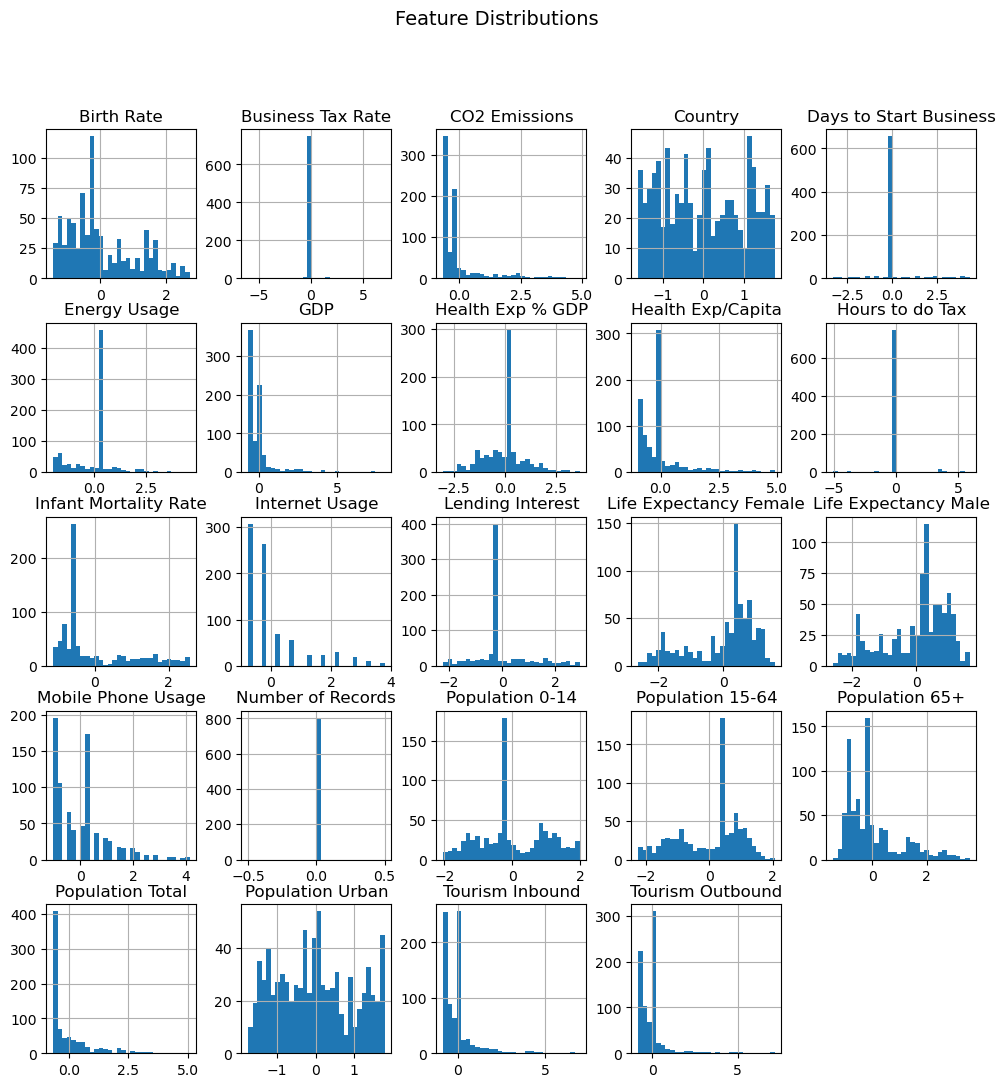

In [37]:
# Distribution of features
plt.figure(figsize=(12, 6))
df_scaled.hist(figsize=(12, 12), bins=30)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

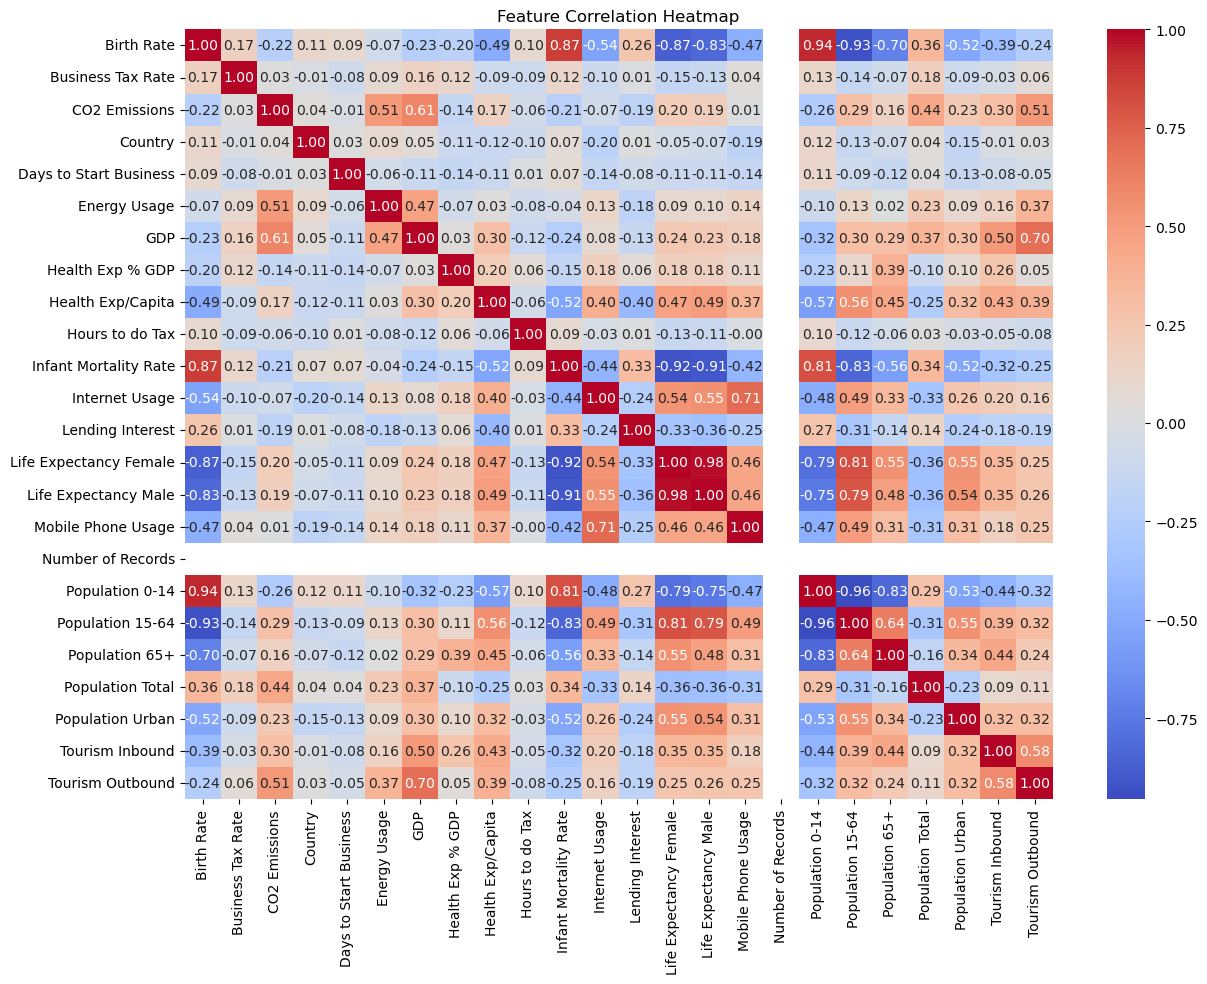

In [38]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [41]:
# ---- PCA for Dimensionality Reduction ----
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

### ---- Clustering ----

### Model 1: K-Means Clustering

Partitioning Clustering Method (K-Means) - Divides data into k clusters by minimizing the sum of squared distances between data points and their assigned cluster centroid.

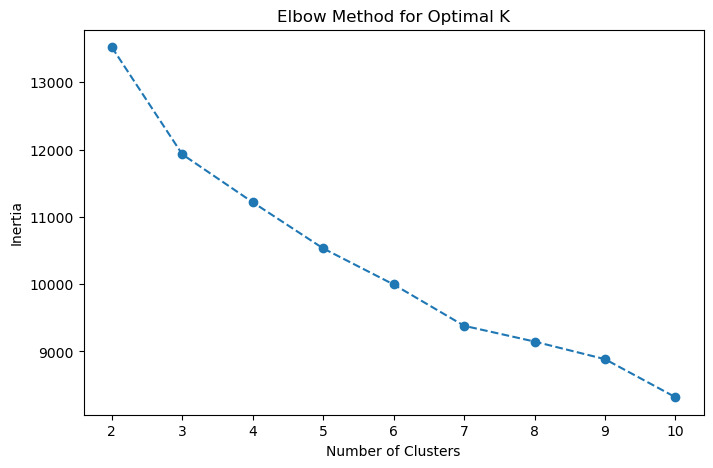

In [46]:
# ---- Elbow Method for Optimal K ----
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [48]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

### Model 2: Hierarchical Clustering

Hierarchical Clustering produces a dendrogram, which is a tree-like diagram that shows the hierarchy of clusters. The dendrogram can be used to visualize the relationships between clusters and to determine the optimal number of clusters.

In [52]:
# Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(df_scaled)

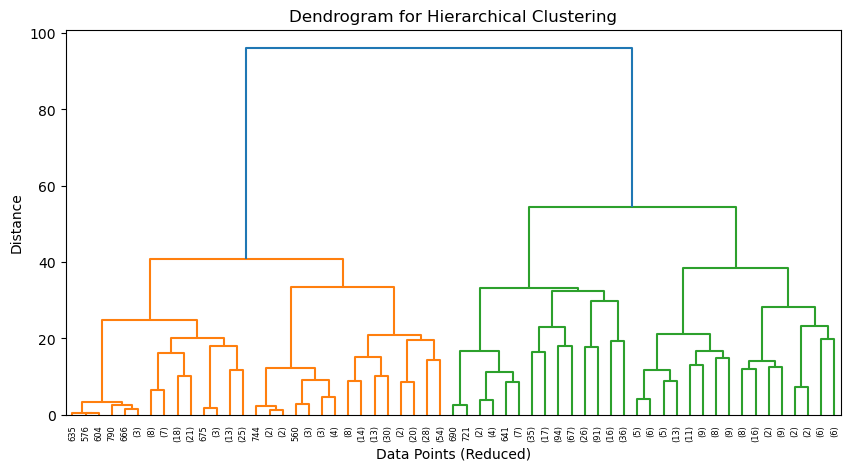

In [54]:
# Dendrogram for Hierarchical Clustering (Reduced Complexity)
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode="level", p=5)  # Adjust p to control depth
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points (Reduced)")
plt.ylabel("Distance")
plt.show()

### Model 3: DBSCAN Clustering

Density-Based Clustering (DBSCAN) - Identifies clusters as areas of high density separated by areas of low density.DBSCAN assigns data points within a dense region to the same cluster.

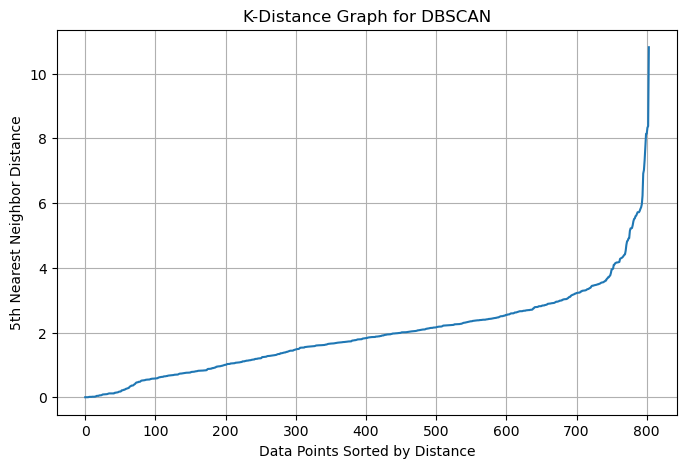

In [58]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-distance for each point (k = min_samples)
k = 5  # This should match the min_samples used in DBSCAN
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Sort the distances (taking the kth nearest neighbor distance for each point)
distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel(f"{k}th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.grid()
plt.show()

In [102]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=4, min_samples=5)  
dbscan_labels = dbscan.fit_predict(df_scaled)

### Model 4: Gaussian Mixture Model (GMM)

Distribution-Based Clustering Method (Gaussian Mixture Models (GMM)) - Assumes data is generated from a mixture of probability distributions and estimates the parameters of these distributions to identify clusters.GMM is a specific type of distribution-based clustering that uses Gaussian distributions.

In [106]:
# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

### ---- Clustering Evaluation ----

In [ ]:
def evaluate_clustering(labels, title):
    if len(set(labels)) > 1:
        sil_score = silhouette_score(df_scaled, labels)
        db_score = davies_bouldin_score(df_scaled, labels)
        ch_score = calinski_harabasz_score(df_scaled, labels)
    else:
        sil_score, db_score, ch_score = np.nan, np.nan, np.nan
    return title, sil_score, db_score, ch_score

In [111]:
# Evaluate Each Model
results = []
results.append(evaluate_clustering(kmeans_labels, "K-Means"))
results.append(evaluate_clustering(agglo_labels, "Agglomerative Clustering"))
results.append(evaluate_clustering(dbscan_labels, "DBSCAN"))
results.append(evaluate_clustering(gmm_labels, "Gaussian Mixture Model"))

In [113]:
results

[('K-Means', 0.18751874886880016, 1.8572506339206076, 172.98888224907938),
 ('Agglomerative Clustering',
  0.16724014560834757,
  1.952344985540844,
  159.9278880654061),
 ('DBSCAN', 0.2213702362967133, 1.6698115420429345, 37.80059439791986),
 ('Gaussian Mixture Model',
  0.14639385929530976,
  2.078230764538755,
  162.43989291922205)]

In [115]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "Silhouette Score", "Davies-Bouldin Score", "Calinski-Harabasz Score"])

<Figure size 1200x600 with 0 Axes>

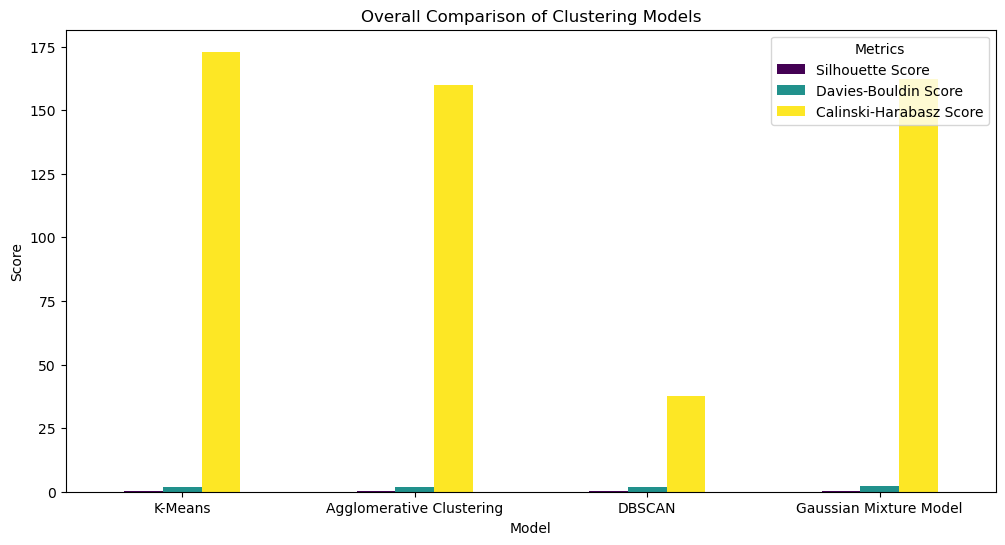

In [117]:
# ---- Overall Comparison Plot ----
plt.figure(figsize=(12, 6))
results_df.set_index("Model").plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Overall Comparison of Clustering Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

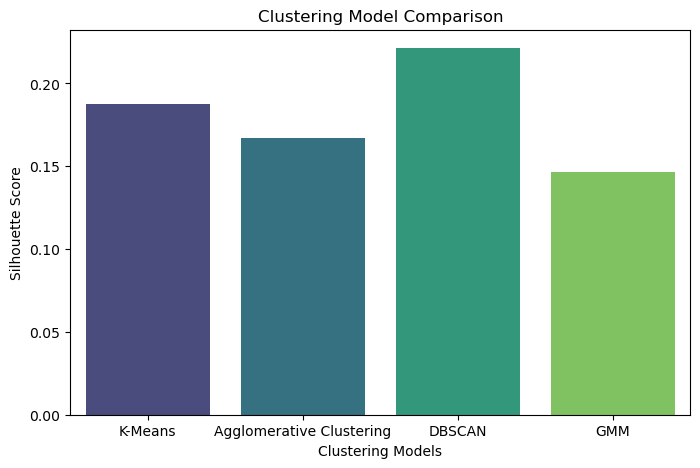

In [119]:
import warnings 
warnings.filterwarnings("ignore")

models = ["K-Means", "Agglomerative Clustering", "DBSCAN", "GMM"]
sil_score = [
    silhouette_score(df_scaled, kmeans_labels),
    silhouette_score(df_scaled, agglo_labels),
    silhouette_score(df_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else np.nan,
    silhouette_score(df_scaled, gmm_labels)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=sil_score, palette='viridis')
plt.xlabel("Clustering Models")
plt.ylabel("Silhouette Score")
plt.title("Clustering Model Comparison")
plt.show()

### ---- Visualization of Clusters Using PCA ----

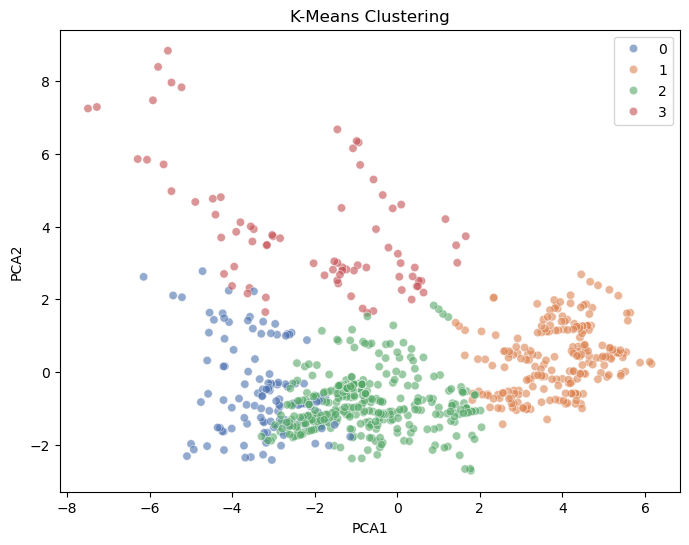

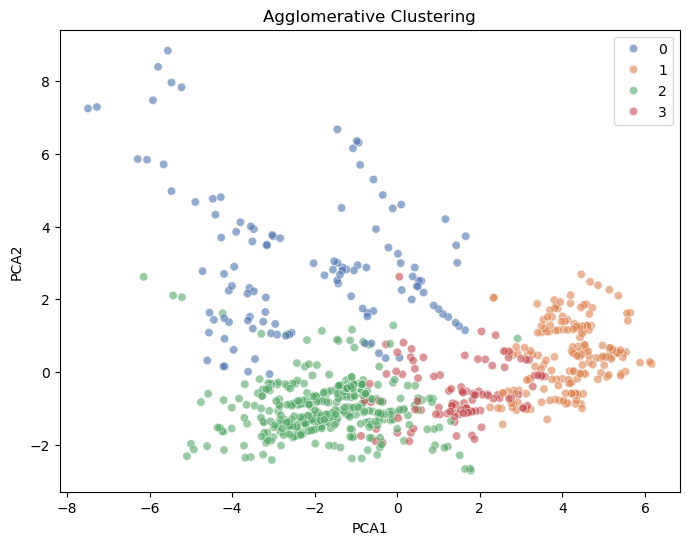

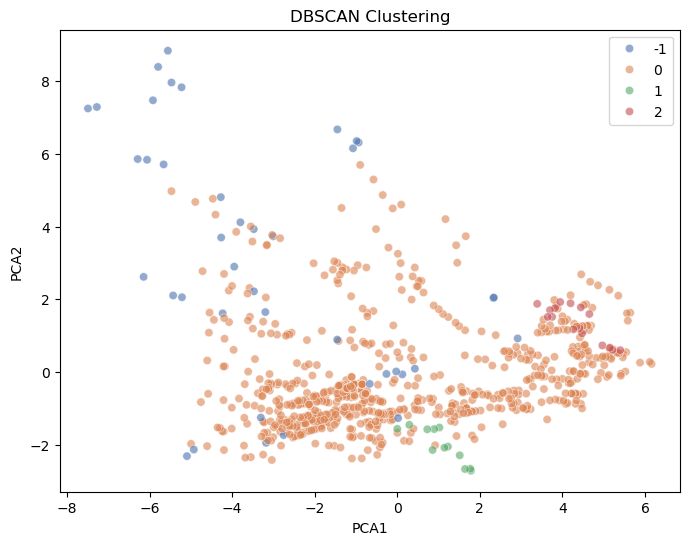

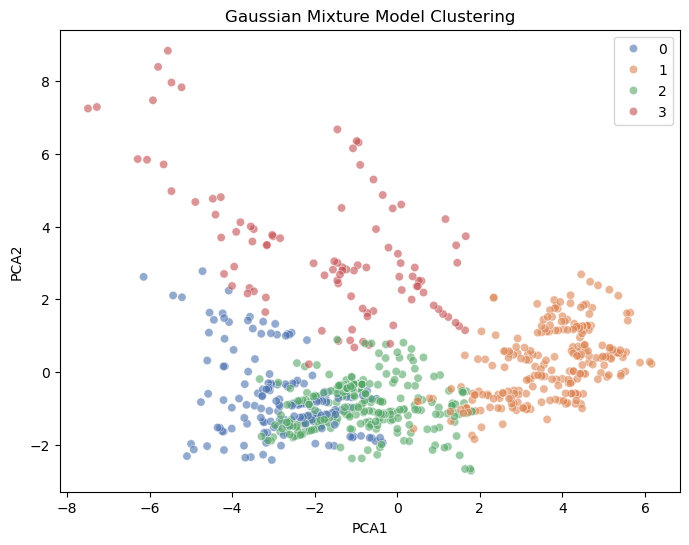

In [122]:
def plot_clusters(labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=labels, palette='deep', alpha=0.6)
    plt.title(title)
    plt.show()

plot_clusters(kmeans_labels, "K-Means Clustering")
plot_clusters(agglo_labels, "Agglomerative Clustering")
plot_clusters(dbscan_labels, "DBSCAN Clustering")
plot_clusters(gmm_labels, "Gaussian Mixture Model Clustering")


Based on evaluation metrics:

Model:
1. K-Means - Silhouette Score ↑ (0.1875) ,Davies-Bouldin Score ↓ (1.8572) , Calinski-Harabasz Score ↑ (172.99)
2. Agglomerative Clustering  -  Silhouette Score ↑ (0.1672) ,Davies-Bouldin Score ↓ (1.9523) , Calinski-Harabasz Score ↑ (159.93)
3. DBSCAN  - Silhouette Score ↑ (0.2214) ,Davies-Bouldin Score ↓ (1.6698) , Calinski-Harabasz Score ↑ (37.80)
4. Gaussian Mixture Model (GMM)  - Silhouette Score ↑ (0.1464) ,Davies-Bouldin Score ↓ (2.0782) , Calinski-Harabasz Score ↑ (162.44)

Key Takeaways:

1. DBSCAN has the highest Silhouette Score (0.2214)
     * Indicates slightly better cluster cohesion.

2. DBSCAN also has the lowest Davies-Bouldin Score (1.6698)
     * Suggests better cluster separation than the other models.
       
3. K-Means has the highest Calinski-Harabasz Score (172.99)
     * Meaning clusters are compact and well-separated.

Best Model Selection:

* If we prioritize compact, well-separated clusters → K-Means is still the best.
* If we prioritize a better-defined cluster shape with noise handling → DBSCAN might be a good choice.